In [1]:
from distortion_correction import DistortionCorrection, path_to_image_gen
from perspective_transform import PerspectiveTransform
import matplotlib.pyplot as plt
from threshold import to_binary
from util import show_images
import matplotlib.image as mpimg
import glob
from pprint import pprint
from collections import OrderedDict
import cv2
import numpy as np

%matplotlib inline

### Pipeline
- distortion correction
- threshold
- perspective

In [2]:
N_ROWS = 6
N_COLS = 9
chessboard_paths = glob.glob('./camera_cal/calibration*.jpg')
chessboards = path_to_image_gen(chessboard_paths)
distortion_correction = DistortionCorrection()
distortion_correction.fit_to_chessboards(chessboards, N_ROWS, N_COLS)

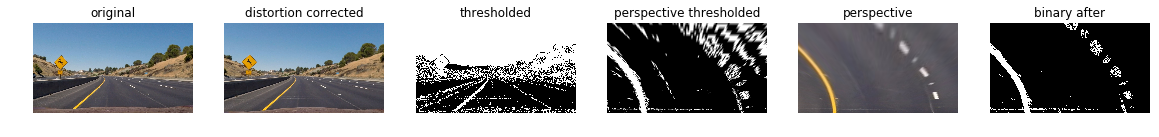

In [3]:
img = mpimg.imread('./test_images/straight_lines1.jpg')
img = mpimg.imread('./test_images/test2.jpg')
corrected = distortion_correction.transform(img)
transformer = PerspectiveTransform(img.shape)

thresholded = to_binary(corrected)
perspective_thresholded = transformer.transform(thresholded)
perspective = transformer.transform(corrected)
binary_after = to_binary(perspective)

show_images(OrderedDict([
    ("original", img),
    ("distortion corrected", corrected),
    ('thresholded', thresholded),
    ('perspective thresholded', perspective_thresholded),
    ('perspective', perspective),
    ('binary after', binary_after)
]))

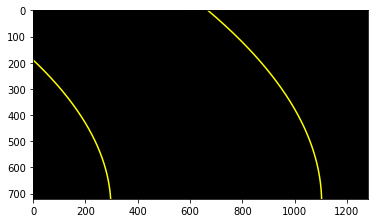

In [4]:
%load_ext autoreload
%autoreload 2

from pipeline import Pipeline
from find_lines import sliding_window
img = mpimg.imread('./test_images/test2.jpg')
# img = mpimg.imread('./test_images/straight_lines1.jpg')
pipeline = Pipeline(img.shape)
warped = pipeline.show_top_down(img)
sliding_window(warped)

(720, 0)

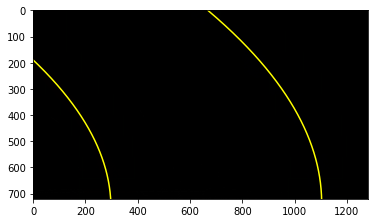

In [5]:
from find_lines import find_lines_with_sliding_window, _active_pixels_in_line_margin

nonzero = warped.nonzero()
nonzero_y = np.array(nonzero[0])
nonzero_x = np.array(nonzero[1])

left_fit, right_fit, out_img = find_lines_with_sliding_window(warped)
ploty = np.linspace(0, img.shape[0]-1, img.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

left_lane_inds = _active_pixels_in_line_margin(warped, left_fit)
right_lane_inds = _active_pixels_in_line_margin(warped, right_fit)

out_img[nonzero_y[left_lane_inds], nonzero_x[left_lane_inds]] = [255, 0, 0]
out_img[nonzero_y[right_lane_inds], nonzero_x[right_lane_inds]] = [0, 0, 255]

plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


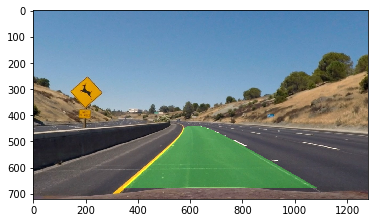

In [8]:
%load_ext autoreload
%autoreload 2

from pipeline import Pipeline

img = mpimg.imread('./test_images/test2.jpg')
pipeline = Pipeline(img.shape)
with_lanes = pipeline.highlight_lane(img)
plt.imshow(with_lanes)

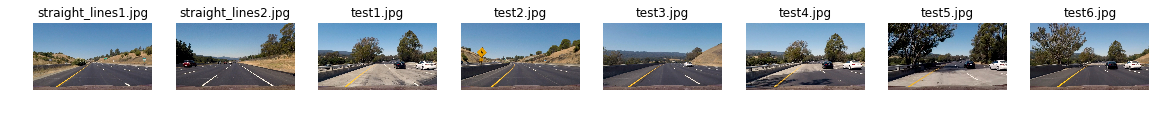

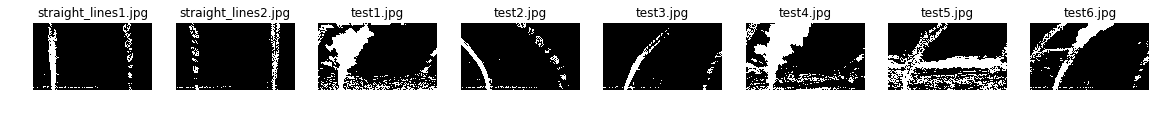

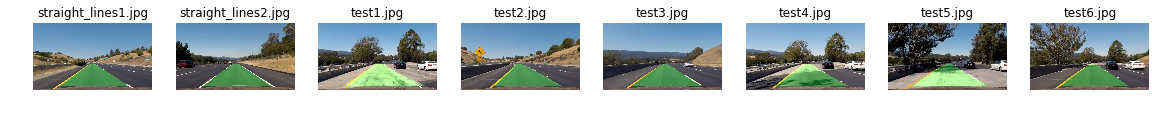

In [9]:
import os
from collections import OrderedDict
TEST_DIR = './test_images'
images = OrderedDict([(path, mpimg.imread(os.path.join(TEST_DIR, path))) for path in os.listdir(TEST_DIR)])
show_images(images)
top_down = OrderedDict([(path, pipeline.show_top_down(img)) for (path, img) in images.items()])
show_images(top_down)
with_lanes = OrderedDict([(path, pipeline.highlight_lane(img)) for (path, img) in images.items()])
show_images(with_lanes)